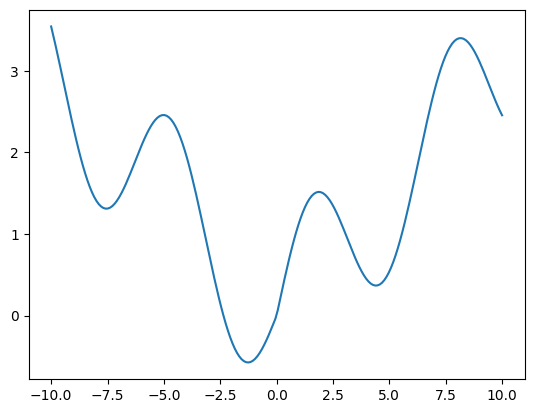

[-0.36724897  7.10942916 -0.11809882 -1.41229132 -1.0915658   4.7075812
 -3.48691655 -4.91337797  4.17938097  0.22309742  4.02252499  4.60297508
  1.36707747 -9.27423651  5.8932359   9.50776603  8.21927413 -1.67519668
  1.99395427  5.8649617   0.39304032 -1.85287947 -2.32686807  5.06046647
 -5.95489322  5.27697058  0.35817443  7.35019359  1.6047002  -2.10135057
  4.61932126 -7.62605144  6.53543765 -7.40117165  7.42779443  3.71661865
  7.24028541 -9.59841381 -7.51033855 -8.91529034  4.8772959   8.69692348
 -0.1431537  -8.06541745  1.13254619 -1.93675608 -3.98977    -2.66165286
  9.58814283  0.32943614 -3.20810358  3.74694483  6.342505    7.50276909
 -6.66671999 -4.53924376 -1.73715607 -9.46844551 -5.50510901  5.96393479
 -1.24751807  4.22798058  5.52974975  6.51127745  0.42119121 -4.06469271
  5.42050456  9.09616992 -3.68387879 -3.62760725 -9.45606681  1.56377871
 -4.77290166 -2.41195922 -8.92310914  9.20488472 -9.22119971 -6.76974183
  6.12442267 -2.15800149  2.30795205 -2.50865606  6.

In [429]:
import numpy as np
import matplotlib.pyplot as plt
from os import system
import math

from matplotlib.animation import FuncAnimation



popsize = 100
keep_frac = 0.4


a   = -10
b   =  10

def func(x):
    #return x**2
    return 0.3*np.abs(x)+np.sin(x)

xs = np.linspace(a,b,200)
ys = func(xs)

plt.figure()
plt.plot(xs,ys)
plt.show()

init = np.random.uniform(a,b,popsize)

print(init)

def initialize_population(size, bounds):
    return np.random.uniform(bounds[0], bounds[1], size)
initialize_population(3,(3,4))


def pause():
    programPause = input("Press the <ENTER> key to continue...")

In [415]:
# Crossover function
def crossover(parent1,parent2):
    alpha = np.random.rand()  # Blend factor: nr aleatoriu in [0,1]
    child1 = alpha * parent1 + (1 - alpha) * parent2
    child2 = alpha * parent2 + (1 - alpha) * parent1
    return child1, child2

In [416]:
# Mutation function
def mutate(individual, mutation_rate=0.1, bounds=(-10, 10)):
    if np.random.rand() < mutation_rate:
        individual += np.random.uniform(-1, 1)  # random intre [-1,1]
        individual = np.clip(individual, bounds[0], bounds[1])  # Keep in bounds
    return individual

40
Generation  0  | Best variable =  -1.3383661918011782  nb Func Eval =  100


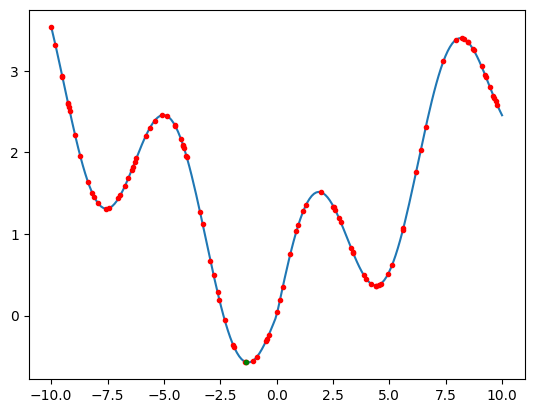

Generation  1  | Best variable =  -1.0790794898333103  nb Func Eval =  200


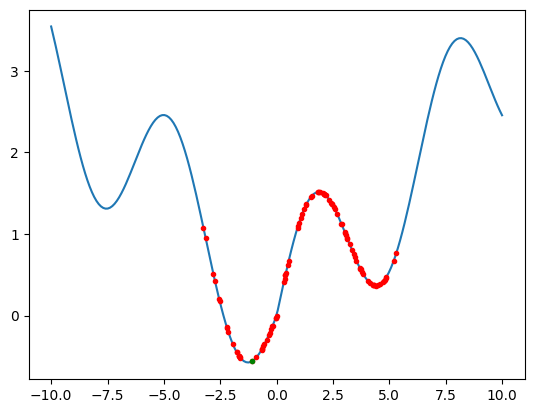

Generation  2  | Best variable =  -1.376471555615638  nb Func Eval =  300


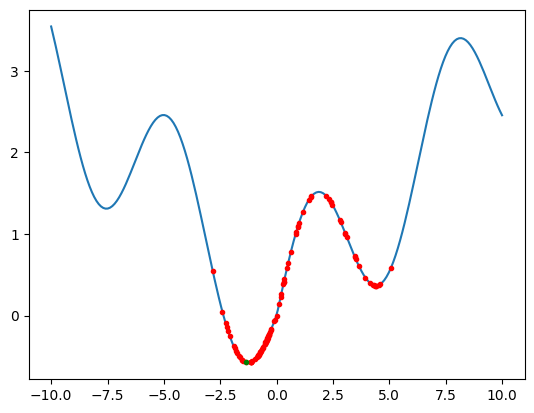

Generation  3  | Best variable =  -1.2768292002563204  nb Func Eval =  400


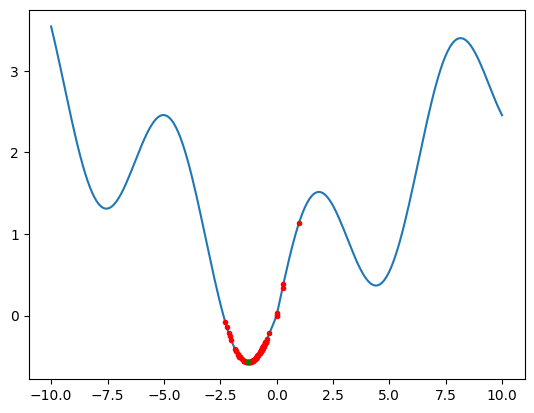

Generation  4  | Best variable =  -1.2639295243962119  nb Func Eval =  500


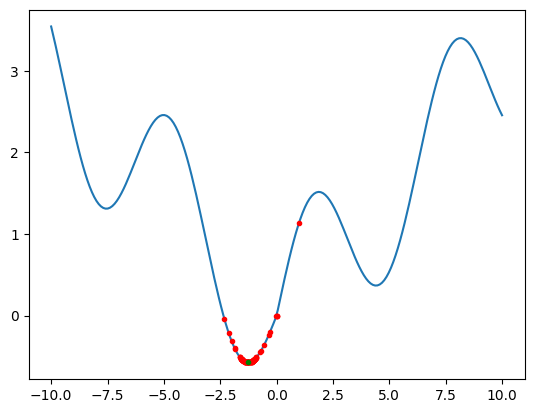

Generation  5  | Best variable =  -1.2683417367676793  nb Func Eval =  600


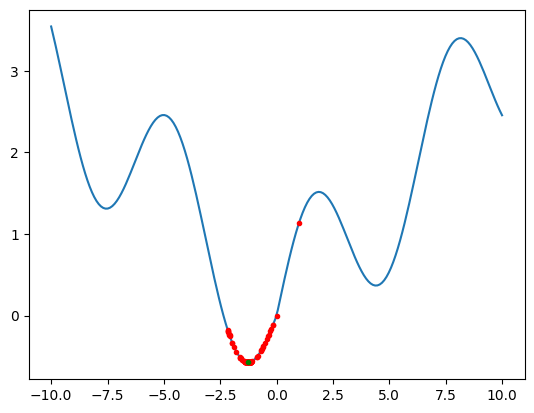

Generation  6  | Best variable =  -1.2666920254402598  nb Func Eval =  700


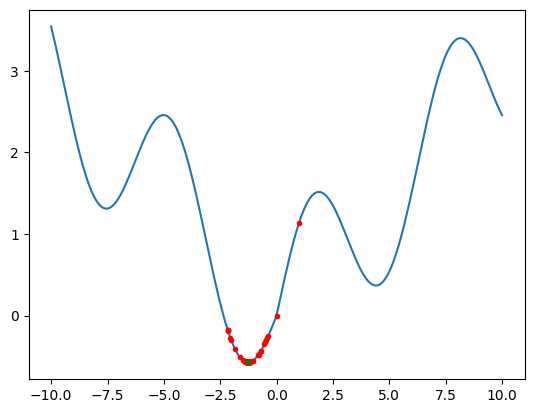

Generation  7  | Best variable =  -1.2666920254402598  nb Func Eval =  800


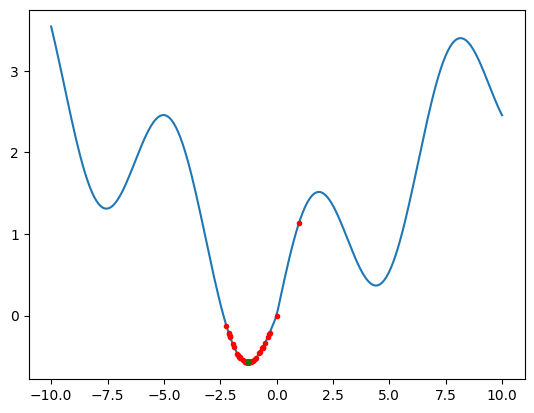

Generation  8  | Best variable =  -1.2659786556377977  nb Func Eval =  900


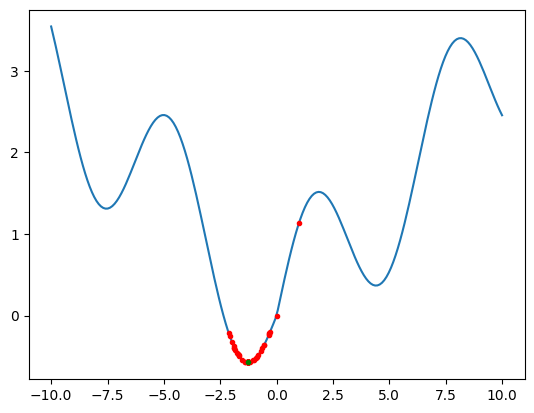

Generation  9  | Best variable =  -1.2660547184918571  nb Func Eval =  1000


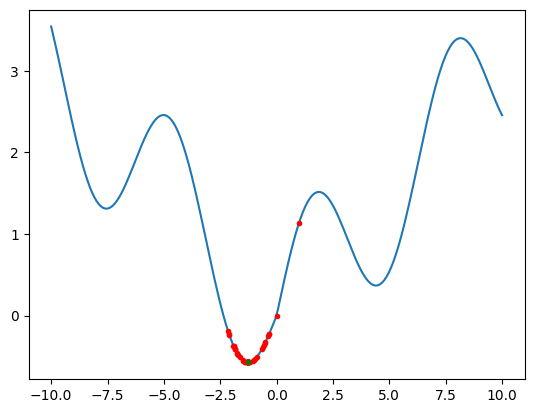

Generation  10  | Best variable =  -1.2661893154537034  nb Func Eval =  1100


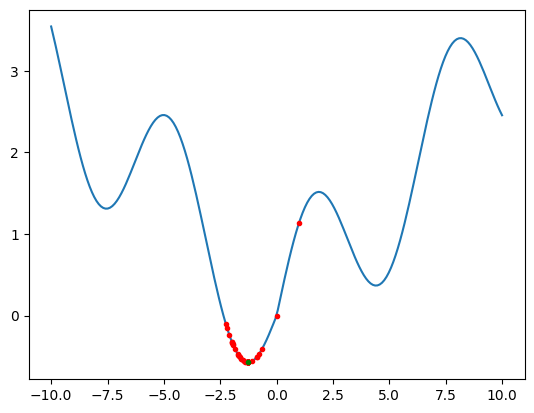

Generation  11  | Best variable =  -1.2661657457380107  nb Func Eval =  1200


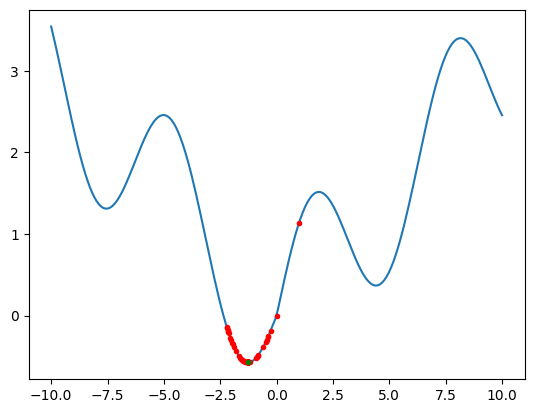

Generation  12  | Best variable =  -1.2661022818366274  nb Func Eval =  1300


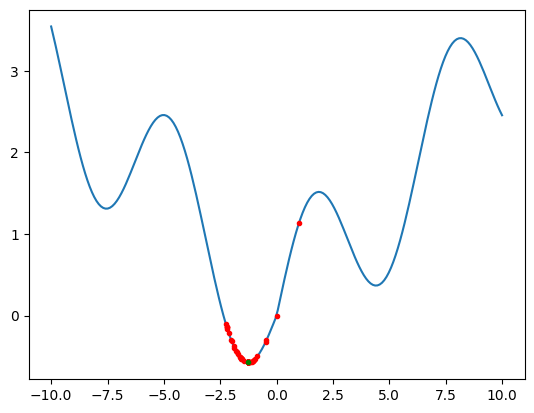

Generation  13  | Best variable =  -1.26610094409328  nb Func Eval =  1400


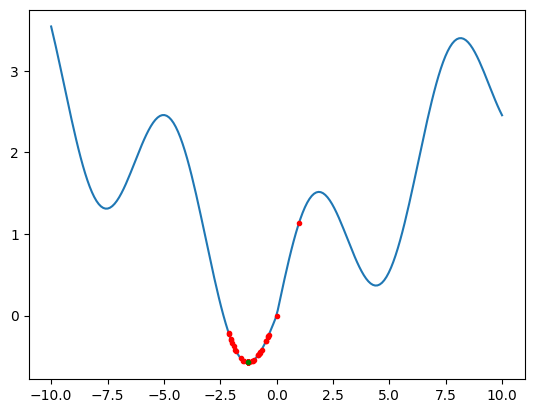

Generation  14  | Best variable =  -1.2661032512399188  nb Func Eval =  1500


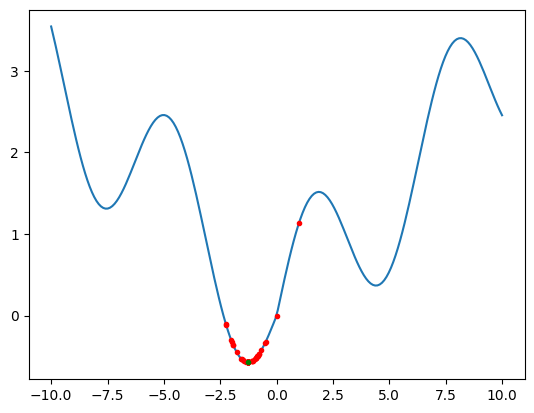

Generation  15  | Best variable =  -1.2661036406948434  nb Func Eval =  1600


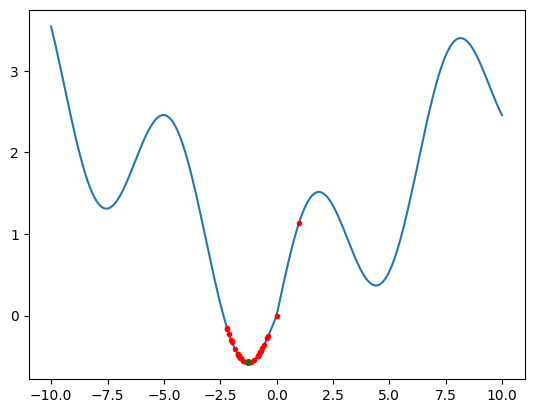

Generation  16  | Best variable =  -1.2661036217173387  nb Func Eval =  1700


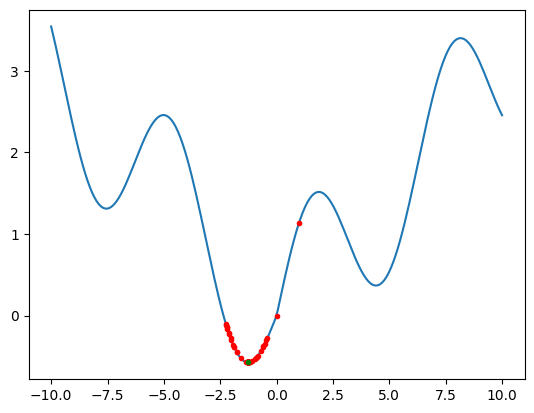

Generation  17  | Best variable =  -1.2661039139502779  nb Func Eval =  1800


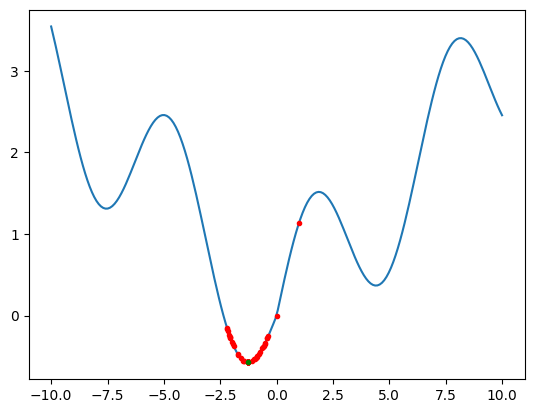

Generation  18  | Best variable =  -1.2661037793160803  nb Func Eval =  1900


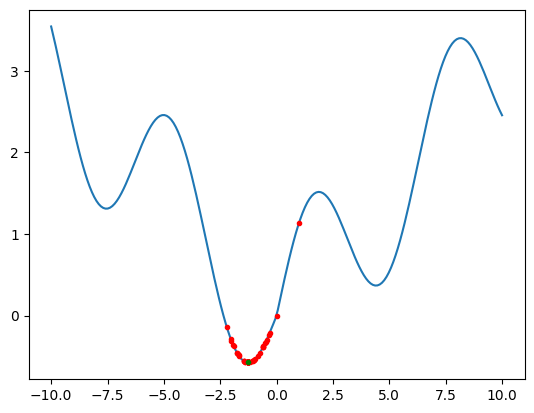

Generation  19  | Best variable =  -1.2661036785361304  nb Func Eval =  2000


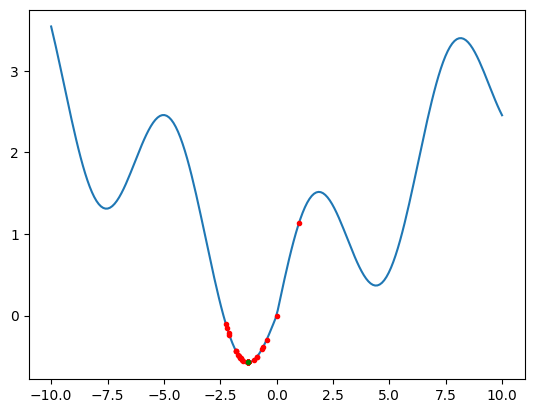

Generation  20  | Best variable =  -1.2661036748948669  nb Func Eval =  2100


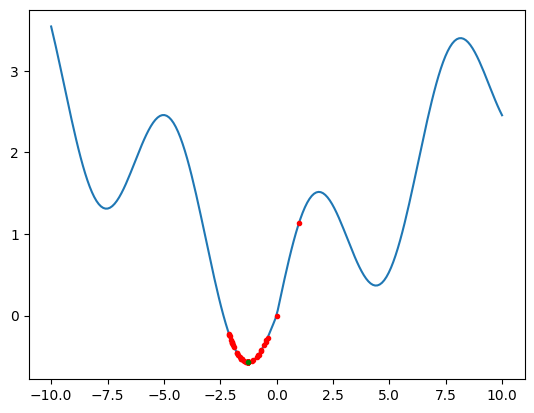

Generation  21  | Best variable =  -1.2661036516459008  nb Func Eval =  2200


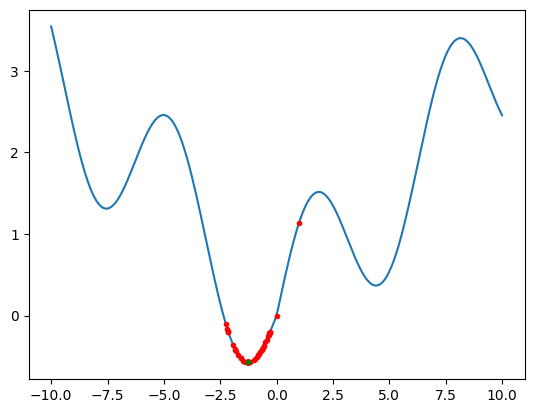

Generation  22  | Best variable =  -1.2661036693733663  nb Func Eval =  2300


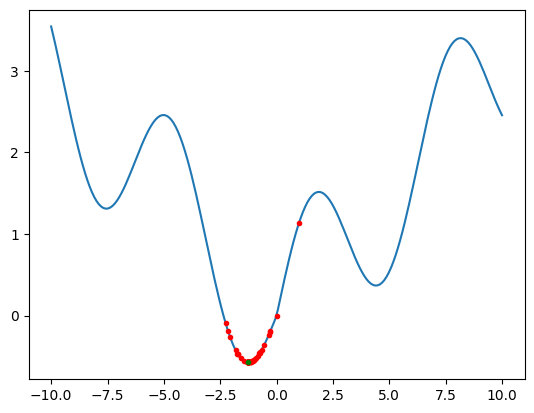

Generation  23  | Best variable =  -1.2661036632019866  nb Func Eval =  2400


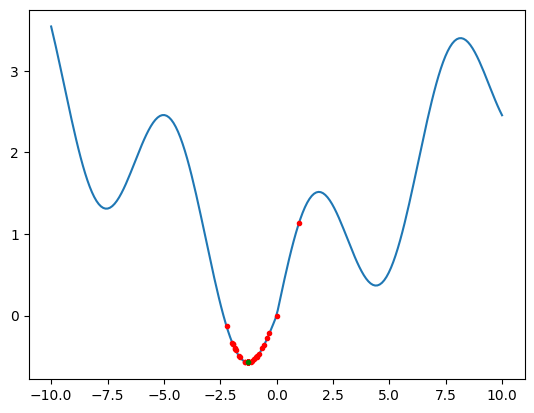

Generation  24  | Best variable =  -1.2661036766210498  nb Func Eval =  2500


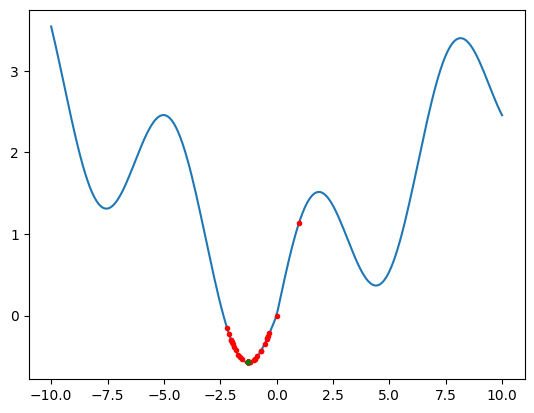

In [433]:
# def function(a,b,c,d=1):

def genetic_algorithm(pop_size=30, generations = 50, bounds=(-10,10)):
    population = initialize_population(pop_size, bounds) # initializare random intre marginile date

    keep_best = math.floor(keep_frac*pop_size)  # proportia de indivizi care raman pentru generatia viitoare
    print(keep_best)

    nfeval = 0                                  # counter pentru nr de evaluari ale functiei

    xs = np.linspace(a,b,200)                   # pentru afisaj grafic
    ys = func(xs)
    
    # plotting the first frame
    plt.figure()
    
    for gen in range(generations):
        # evaluate objective function
        # ori evaluare directa in numpy
        # ori facem un loop peste fiecare individ din populatie
        vals = func(population)

        #plt.clear()
        
        plt.plot(xs,ys)
        plt.plot(population,vals,'.r')
        plt.draw()

        nfeval+=len(population)

        # np.argsort sorteaza array-ul si returneaza indicii care efectueaza sortarea
        # Partea de Selectie
        ind = np.argsort(vals)
        bestpop = population[ind[0:keep_best]]   # cei mai buni x% indivizi
        
        # Construim populatia de la generatia urmatoare! 
        nextpop = bestpop
        nextpop = np.array((0,1))

        # Crossover+Mutatii
        while len(nextpop)<pop_size:
            # alegem doua elemente random in populatia initiala
            #ii = np.random.randint(len(population), size=2)
            
            # folosim doar bestpop
            ii = np.random.randint(len(bestpop), size=2)


            # Operator Crossover
            #c1,c2 = crossover(population[ii[0]],population[ii[1]])
            c1,c2 = crossover(bestpop[ii[0]],bestpop[ii[1]])

            # Operator Mutatie
            c1 = mutate(c1,mutation_rate=0.3, bounds=(a, b))
            c2 = mutate(c2,mutation_rate=0.3, bounds=(a, b))

                    
            nextpop = np.append(nextpop,c1)
            if len(nextpop)==pop_size:
                break
            nextpop = np.append(nextpop,c2)
            if len(nextpop)==pop_size:
                break

        print("Generation ",gen," | Best variable = ",bestpop[0]," nb Func Eval = ",nfeval)
        plt.plot(bestpop[0],vals[ind[0]],'.g')
        #pause()
        plt.pause(0.1)

        population = nextpop
            

# nr de evaluari ale functiei obiectiv este
# nr de indivizi * nr de generatii
genetic_algorithm(100,25,(a,b))

In [434]:
import struct

def bin2float(b):
    ''' Convert binary string to a float.

    Attributes:
        :b: Binary string to transform.
    '''
    h = int(b, 2).to_bytes(8, byteorder="big")
    return struct.unpack('>d', h)[0]


def float2bin(f):
    ''' Convert float to 64-bit binary string.

    Attributes:
        :f: Float number to transform.
    '''
    [d] = struct.unpack(">Q", struct.pack(">d", f))
    return f'{d:064b}'


In [436]:
s = float2bin(10.353)
print(s)
n = bin2float(s)
print(n)

0100000000100100101101001011110001101010011111101111100111011011
10.353


In [526]:
def crossString(s1,s2):
    # cross two strings assuming equal lengths
    n = len(s1)
    
    i = np.random.randint(n)

    news1 = s1[0:i]+s2[i:]
    news2 = s2[0:i]+s1[i:]

    show = 0
    if show==1:
        print(i)

        print(s1)
        print(news1)
        print(" ")
        print(s2)
        print(news2)

    return news1, news2

In [527]:
s1 = float2bin(10.353)
s2 = float2bin(3.2534)

print(s1)
print(s2)
q1, q2 = crossString(s1,s2)

print(bin2float(q1))
print(bin2float(q2))

0100000000100100101101001011110001101010011111101111100111011011
0100000000001010000001101111011010010100010001100111001110000010
10.352999999938906
3.2534000000152736


In [197]:
# Crossover function
def crossover2(parent1,parent2):
    s1 = float2bin(parent1)
    s2 = float2bin(parent2)
    q1, q2 = crossString(s1,s2)

    child1 = bin2float(q1)
    child2 = bin2float(q2)

    return child1, child2

In [408]:
def mutate2(individual, mutation_rate=0.4,bounds=(-10, 10)):
    a = (np.random.rand(1))
    try:
        if a <mutation_rate:
            s1 = float2bin(individual)
            n = len(s1)
            
            for i in range(0,8):
                i = np.random.randint(n)
                if(s1[i]=="0"):
                    news1 = s1[0:i-1]+"1"+s1[i:]
                else:
                    news1 = s1[0:i-1]+"0"+s1[i:]
                s1 = news1
            individual = bin2float(news1)
            individual = np.clip(individual, bounds[0], bounds[1])  # Keep in bounds

            return individual
        else:
            return individual
    except:
        return individual

In [545]:
mutate2(0.4,mutation_rate=0.9)

0.19999999999818102

40
Generation  0  | Best variable =  -1.5619831171834129  nb Func Eval =  100


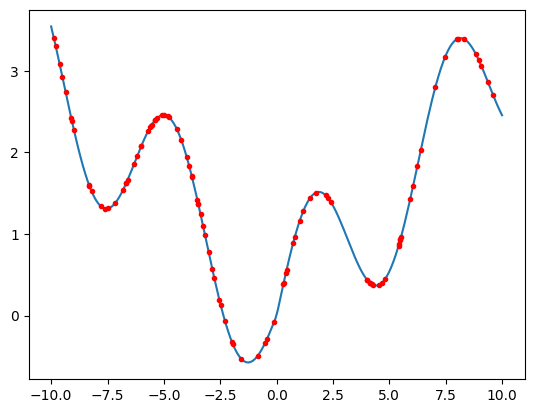

Generation  1  | Best variable =  -1.041876682408919  nb Func Eval =  200


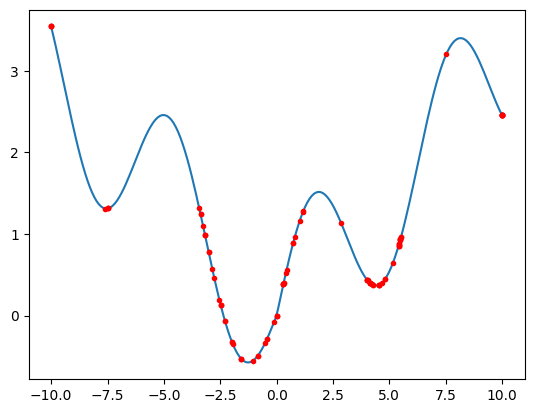

Generation  2  | Best variable =  -1.0418919411980996  nb Func Eval =  300


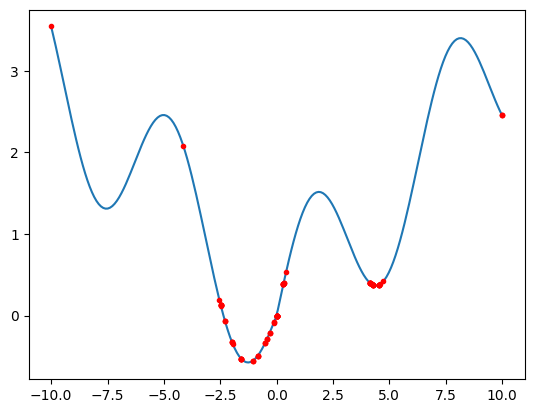

Generation  3  | Best variable =  -1.0462281163516431  nb Func Eval =  400


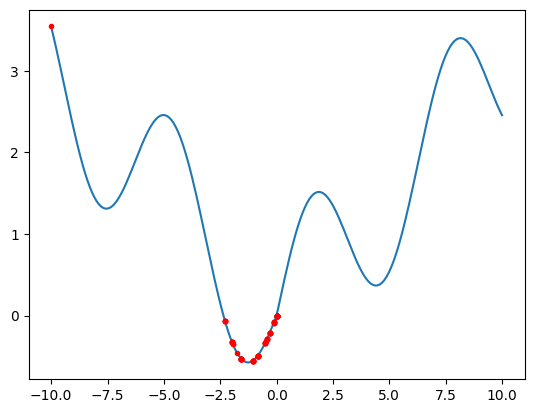

Generation  4  | Best variable =  -1.056112835648353  nb Func Eval =  500


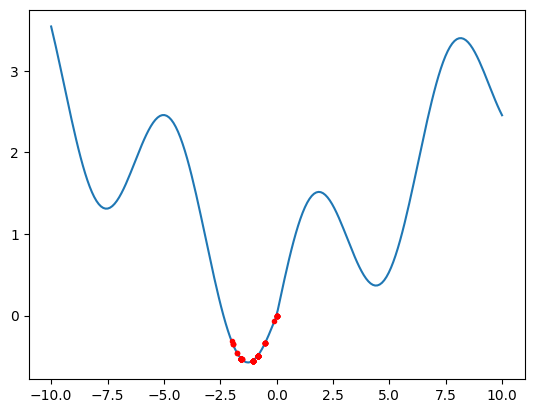

Generation  5  | Best variable =  -1.056112835648353  nb Func Eval =  600


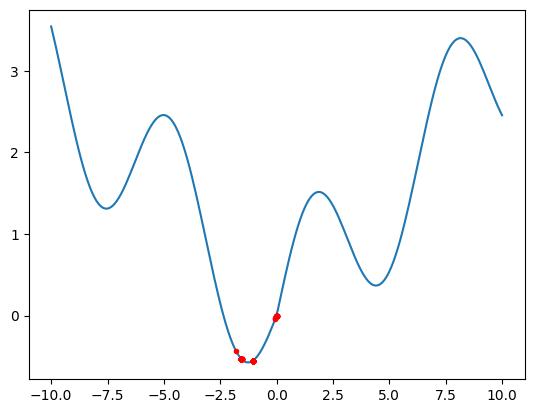

Generation  6  | Best variable =  -1.056112835648353  nb Func Eval =  700


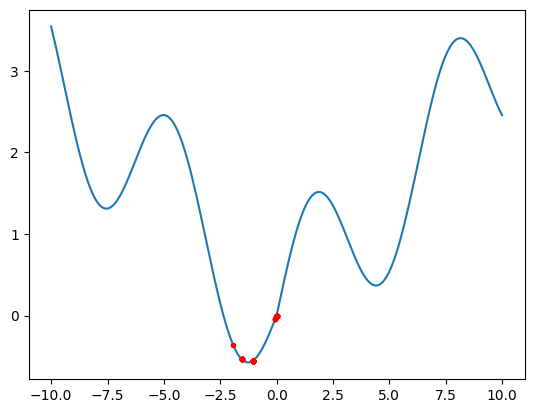

Generation  7  | Best variable =  -1.291647800563485  nb Func Eval =  800


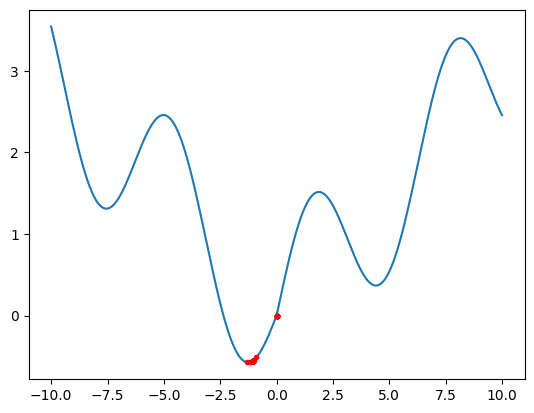

Generation  8  | Best variable =  -1.291647800563454  nb Func Eval =  900


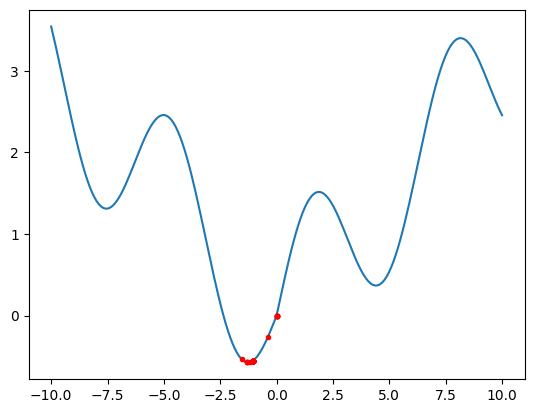

Generation  9  | Best variable =  -1.291647800563454  nb Func Eval =  1000


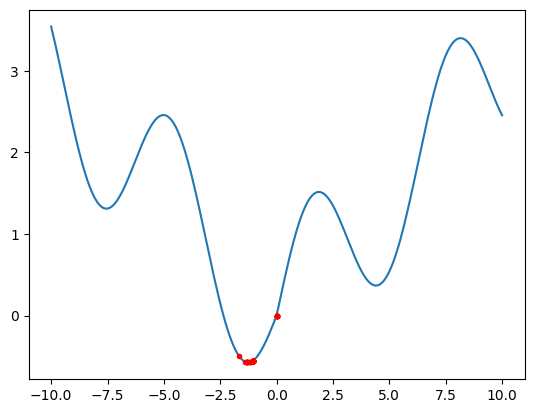

Generation  10  | Best variable =  -1.2916475036171033  nb Func Eval =  1100


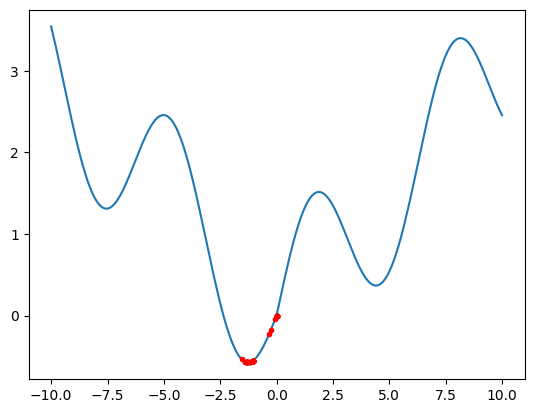

Generation  11  | Best variable =  -1.2916473237226889  nb Func Eval =  1200


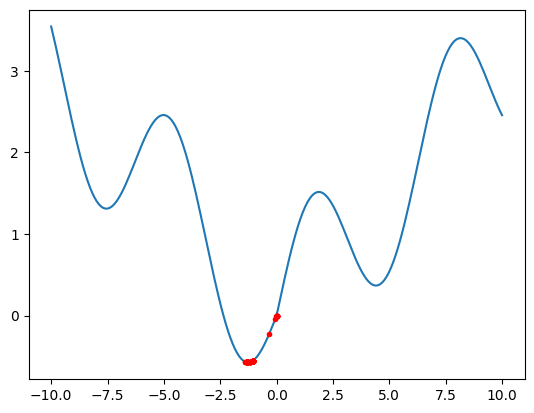

Generation  12  | Best variable =  -1.2916466644335864  nb Func Eval =  1300


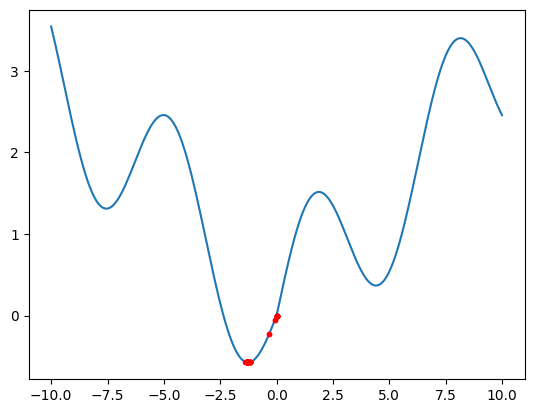

Generation  13  | Best variable =  -1.2916439895878717  nb Func Eval =  1400


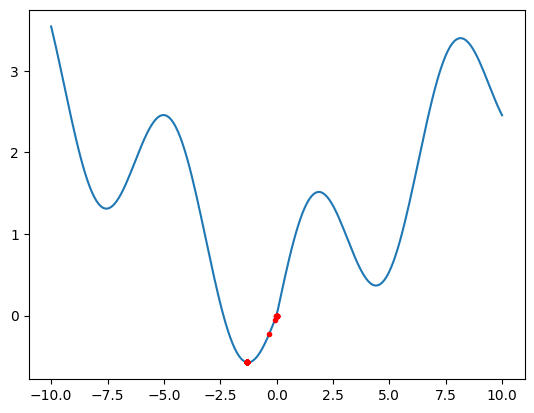

Generation  14  | Best variable =  -1.2916439895769578  nb Func Eval =  1500


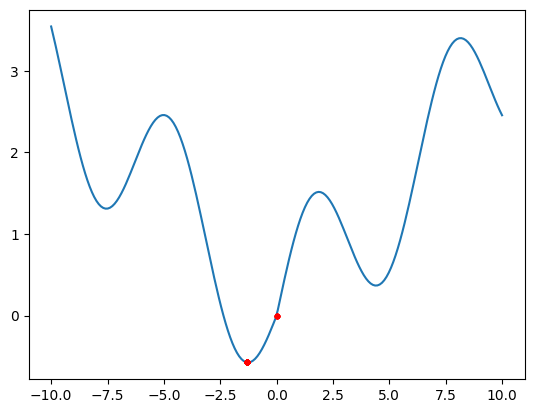

Generation  15  | Best variable =  -1.2916439858661883  nb Func Eval =  1600


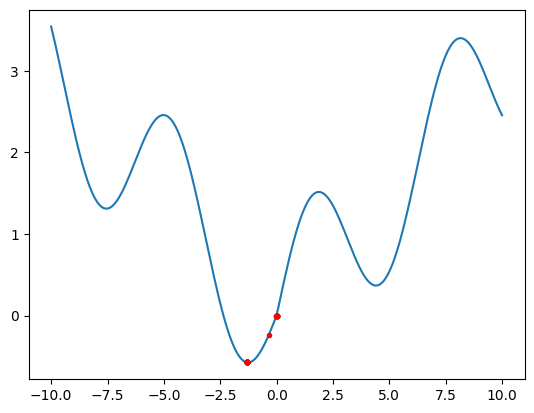

Generation  16  | Best variable =  -1.291643509025409  nb Func Eval =  1700


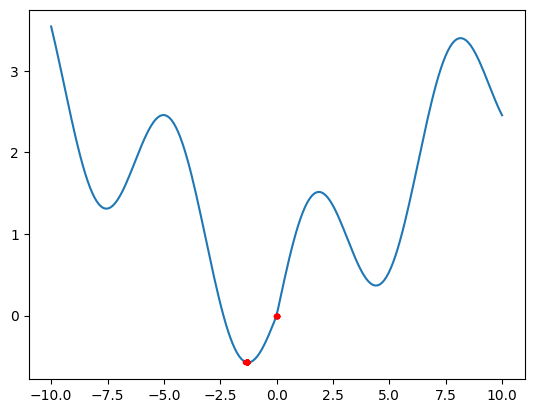

Generation  17  | Best variable =  -1.291643509025409  nb Func Eval =  1800


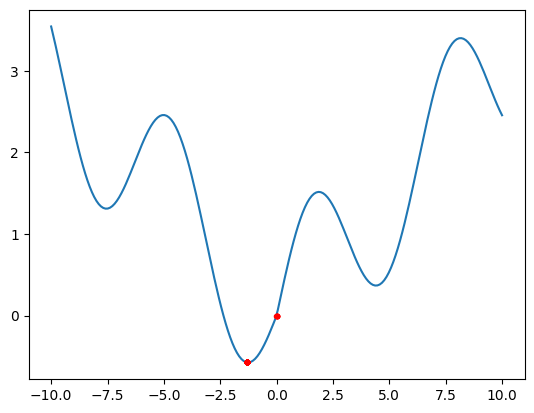

Generation  18  | Best variable =  -1.291643509025409  nb Func Eval =  1900


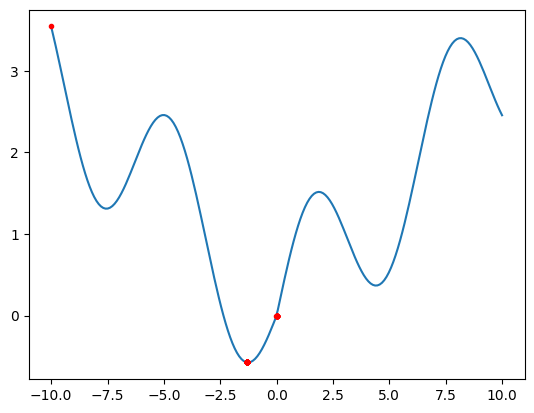

Generation  19  | Best variable =  -1.2915824738546355  nb Func Eval =  2000


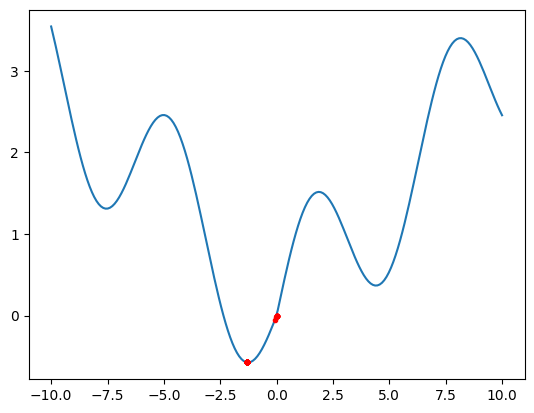

Generation  20  | Best variable =  -1.2915824738546213  nb Func Eval =  2100


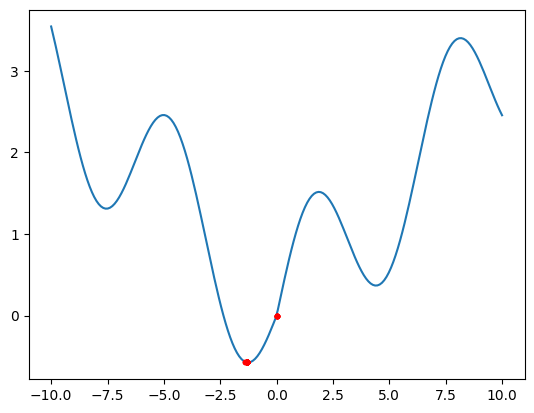

Generation  21  | Best variable =  -1.2915824738546213  nb Func Eval =  2200


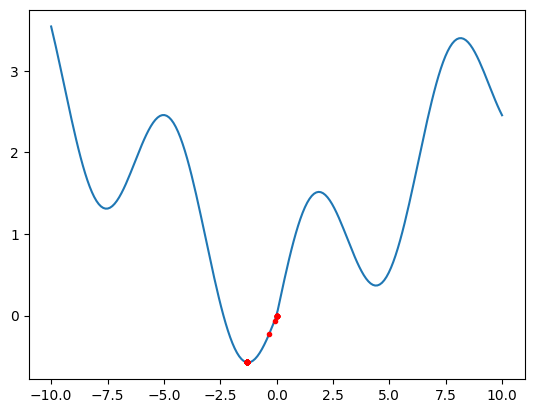

Generation  22  | Best variable =  -1.2915824738546213  nb Func Eval =  2300


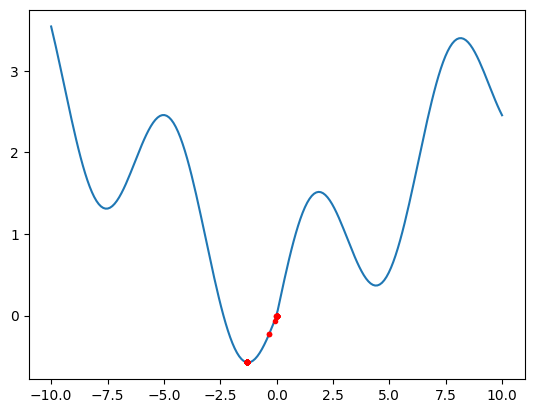

Generation  23  | Best variable =  -1.2915822354505804  nb Func Eval =  2400


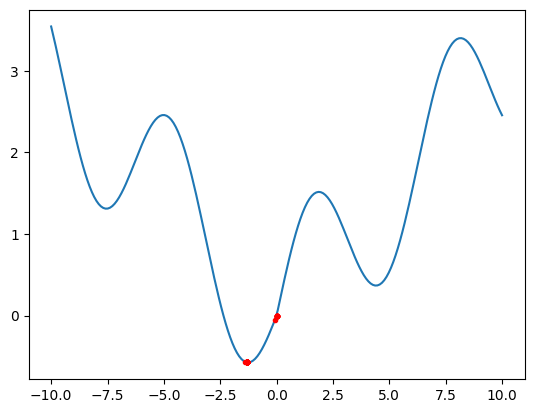

Generation  24  | Best variable =  -1.2915822354505804  nb Func Eval =  2500


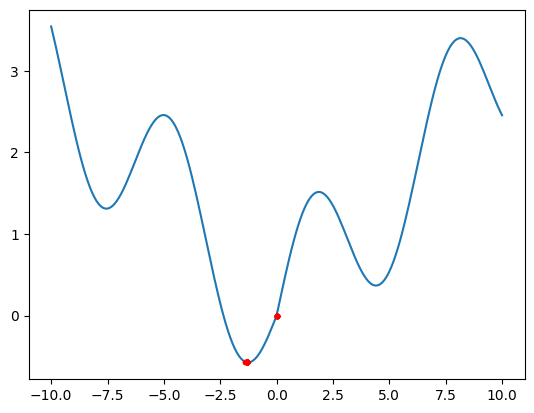

Generation  25  | Best variable =  -1.2915822354505804  nb Func Eval =  2600


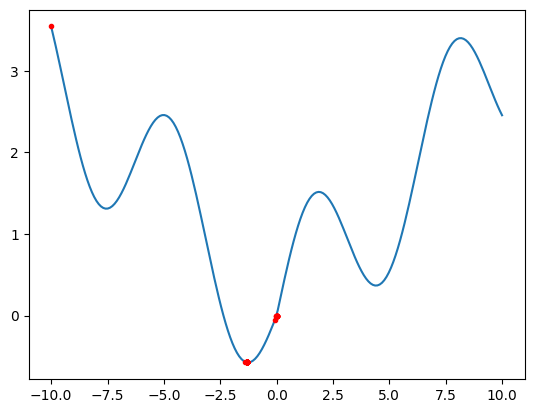

Generation  26  | Best variable =  -1.291582235436028  nb Func Eval =  2700


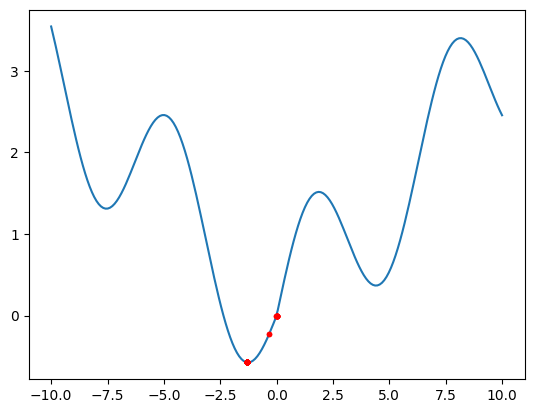

Generation  27  | Best variable =  -1.291582235436029  nb Func Eval =  2800


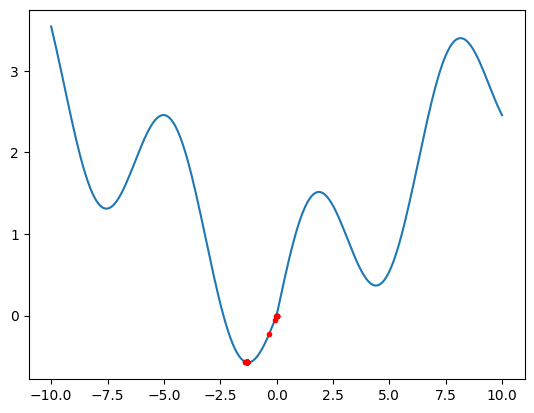

Generation  28  | Best variable =  -1.291582235436029  nb Func Eval =  2900


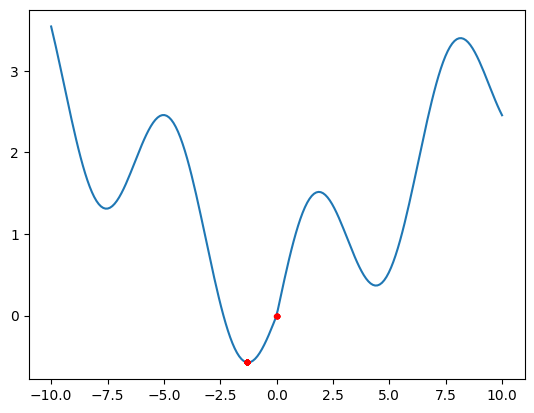

Generation  29  | Best variable =  -1.2915821758459352  nb Func Eval =  3000


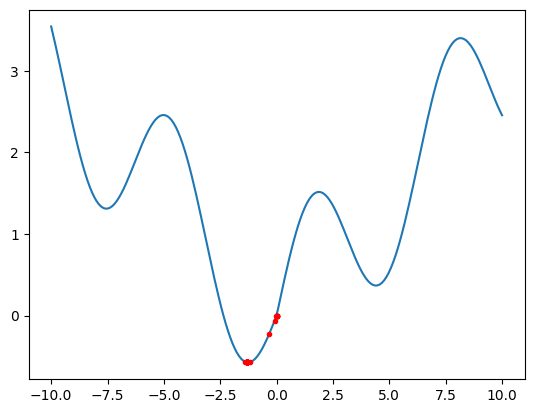

In [547]:
def genetic_algorithm(pop_size=30, generations = 50, bounds=(-10,10)):
    population = initialize_population(pop_size, bounds)

    keep_best = math.floor(keep_frac*pop_size)
    print(keep_best)

    nfeval = 0

    xs = np.linspace(a,b,200)
    ys = func(xs)
    
    # plotting the first frame
    plt.figure()
    
    for gen in range(generations):
        # evaluate objective function
        vals = func(population)

        #plt.clear()
        
        plt.plot(xs,ys)
        plt.plot(population,vals,'.r')
        plt.draw()

        nfeval+=len(population)

        ind = np.argsort(vals)
        bestpop = population[ind[0:keep_best]]
        

        nextpop = bestpop
        while len(nextpop)<pop_size:
            ii = np.random.randint(len(bestpop), size=2)
            
            c1,c2 = crossover2(bestpop[ii[0]],bestpop[ii[1]])

            c1 = np.clip(c1, bounds[0], bounds[1])
            
            c1 = mutate2(c1,mutation_rate=0.3, bounds=(a, b))
                    
            nextpop = np.append(nextpop,c1)

        print("Generation ",gen," | Best variable = ",bestpop[0]," nb Func Eval = ",nfeval)
        plt.pause(0.5)

        population = nextpop
            

genetic_algorithm(100,30,(a,b))